In [1077]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [1078]:
# read data
X = pd.read_csv('DATA\\X_data.csv')
y = pd.read_csv('DATA\\y_data.csv')

## Trực quan hóa dữ liệu khi bỏ nhãn dữ liệu với PCA

In [1079]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [1080]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=16)

X_t = pca.fit_transform(X_scaled)

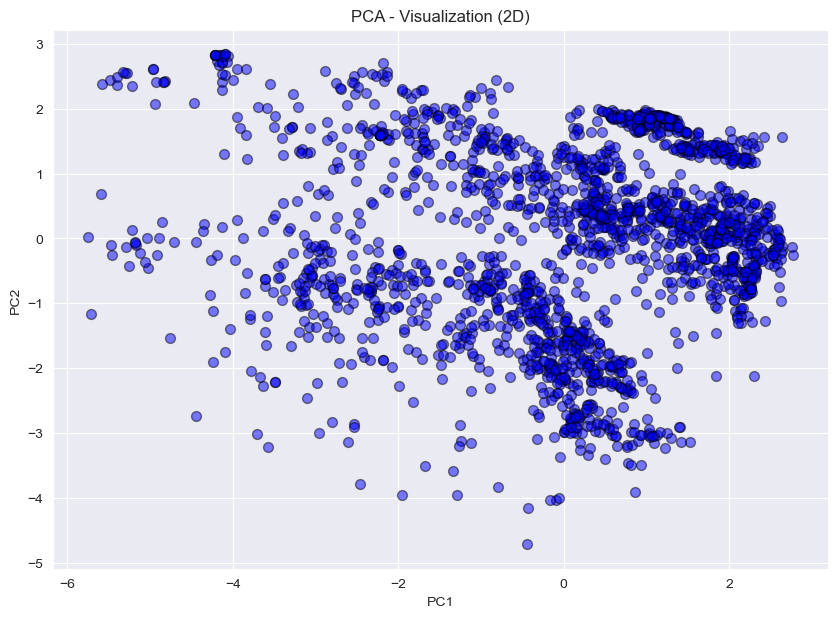

In [1081]:
# Visualize data
import matplotlib.pyplot as plt

# Visualize data with 2 principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_t[:, 0], X_t[:, 1], c='blue', edgecolor='k', s=50, alpha=0.5)
plt.title("PCA - Visualization (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.savefig('Img\\Clutering_PCA_2D.png')
plt.show()

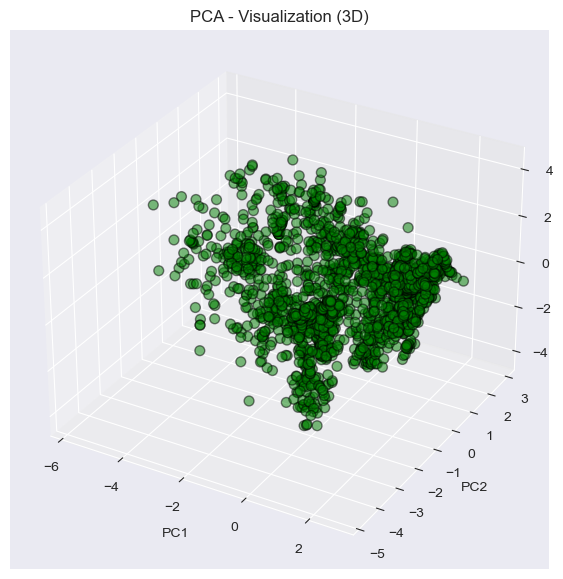

In [1082]:
# Visualize data with 3 principal components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_t[:, 0], X_t[:, 1], X_t[:, 2], c='green', edgecolor='k', s=50, alpha=0.5)
ax.set_title("PCA - Visualization (3D)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.grid(True)
plt.savefig('Img\\Clutering_PCA_3D.png')
plt.show()

### KMeans

In [1083]:
# KMeans model
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X_t)

kmeans_labels = kmeans.fit_predict(X_t)

C:\Users\buian\.conda\envs\Py310-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\buian\.conda\envs\Py310-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [1084]:
# labels of KMeans
centers = kmeans.cluster_centers_
print(centers)


[[ 0.46777566 -0.85534943 -2.11325386 -1.59817641 -0.06088055  0.03056705
  -0.06131271 -0.25641676 -0.14648765 -0.21289301 -0.04328133 -0.29210165
   0.15045975  0.32683039  0.36598678  0.44267611]
 [-1.14105877  1.07556078 -0.10296277  0.51972468 -0.3509578  -0.75342563
  -1.19268382  0.54421817  0.39062468  0.31912692 -0.12233989 -0.40341676
   0.02888351  0.12834914  0.3852677   0.24268813]
 [-0.40316794 -1.66254188 -0.35786772  1.37716596 -0.19752681 -0.26603857
   0.1513366  -0.2547515   0.12832147  0.17345603  0.17110416  0.06255364
   0.03127763 -0.05161273  0.03945008 -0.17509073]
 [ 1.55151694  0.01674821  0.76790849 -0.33658282 -0.34372686  0.19424386
  -0.40278955 -0.03194263  0.11981229  0.05643235  0.20264037 -0.08168504
  -0.04743486 -0.10060856 -0.34984909  0.12328086]
 [-3.08864361  0.48096525  1.04470482 -0.79907393 -0.07737055  0.80714026
   0.56048239 -0.68341218 -0.4450491  -0.19491584  0.21085712  0.28662331
  -0.01193005  0.1482959  -0.08818843  0.03762714]
 [ 1.

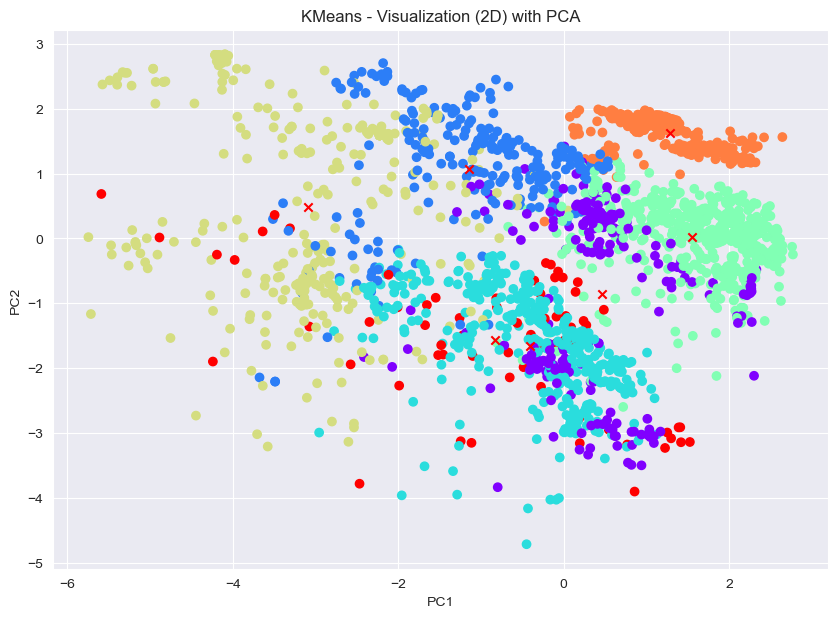

In [1085]:
# Visualize KMeans with 2 principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_t[:, 0], X_t[:, 1], c=kmeans_labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title("KMeans - Visualization (2D) with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.savefig('Img\\KMeans_2D_PCA.png')
plt.show()



In [1086]:
# Tính Silhouette Score và Davies-Bouldin Index
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
sil_score = silhouette_score(X_t, kmeans_labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_t, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")


Silhouette Score: 0.1587
Davies-Bouldin Index: 1.7801


In [1087]:

import pandas as pd

# Tạo DataFrame để dễ phân tích
df = pd.DataFrame({'Cluster': kmeans_labels, 'Output': y.values.flatten()})

# Đếm tần suất nhãn trong mỗi cụm
cluster_counts = df.groupby(['Cluster', 'Output']).size().unstack(fill_value=0)
print(cluster_counts)


Output     0    1    2    3    4   5    6
Cluster                                  
0          0   10   74   30    1  45   59
1         74   78   18    0    0  53   19
2         45   45  149   57    0  38   73
3         28   33   79  205    1  86  105
4        124  100    5    2    0  44   12
5          0    3   12    1  322   8    3
6          1   18   14    2    0  16   19


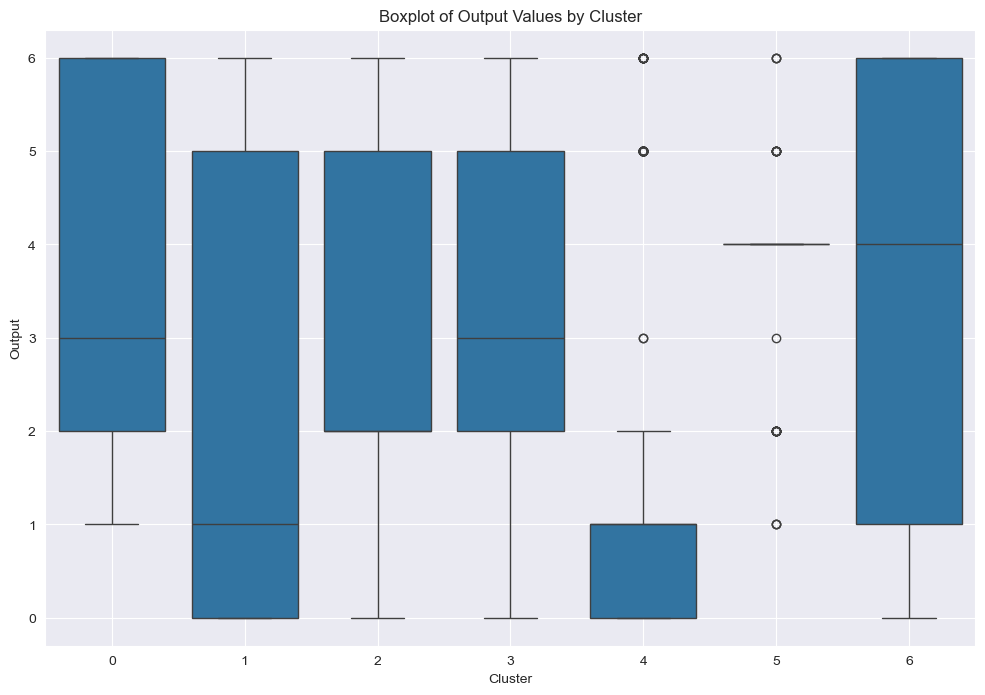

In [1088]:
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ hộp cho từng cụm
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Output', data=df)
plt.title("Boxplot of Output Values by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Output")
plt.grid(True)
plt.savefig('Img\\Boxplot_Clustering.png')
plt.show()



### DBScan

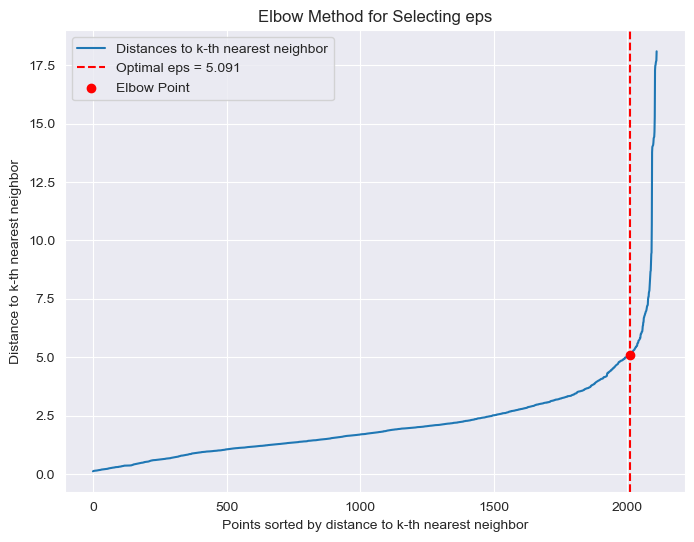

Optimal eps: 5.090915004608133


In [1089]:
from sklearn.cluster import DBSCAN

# find optimal eps
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# Số lượng lân cận k (k-th neighbor)
min_samples = pca.n_components + 1  # Sử dụng số thành phần PCA hoặc giá trị tùy chỉnh
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(X_t)  # X_t là dữ liệu sau khi giảm chiều với PCA
distances, indices = nbrs.kneighbors(X_t)

# Tính khoảng cách tới k-th nearest
distances = np.sort(distances, axis=0)[:, -1]

# Sử dụng Kneedle Algorithm để tìm điểm gập (elbow)
kneedle = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
eps = distances[kneedle.knee]  # Giá trị eps tại "elbow"

# Vẽ đồ thị và trực quan hóa eps tối ưu
plt.figure(figsize=(8, 6))
plt.plot(distances, label="Distances to k-th nearest neighbor")
plt.axvline(x=kneedle.knee, color='r', linestyle='--', label=f"Optimal eps = {eps:.3f}")
plt.scatter(kneedle.knee, eps, color='red', label="Elbow Point", zorder=5)
plt.title("Elbow Method for Selecting eps")
plt.xlabel("Points sorted by distance to k-th nearest neighbor")
plt.ylabel("Distance to k-th nearest neighbor")
plt.legend()
plt.show()

# In giá trị eps
print(f"Optimal eps: {eps}")

In [1090]:
# DBScan
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_t)


DBSCAN(eps=np.float64(5.090915004608133), min_samples=17)

In [1091]:
dbscan_labels = dbscan.fit_predict(X_t)
dbscan_labels

array([ 0, -1,  1, ...,  0,  0,  0])

In [1092]:
print(np.unique(dbscan_labels))

[-1  0  1  2  3  4]


Number of clusters: 5
Number of noise points: 56


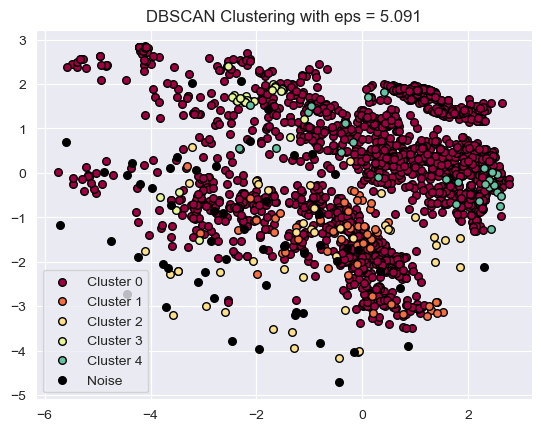

In [1093]:
# visualizing the clusters

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Trực quan hóa các cụm
unique_labels = set(dbscan_labels)

# Tạo danh sách màu sắc cho các cụm
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Điểm nhiễu (noise) được gắn nhãn là -1
        color = [0, 0, 0, 1]  # Màu đen cho noise

    # Lấy các điểm thuộc về cụm hiện tại
    cluster_points = (dbscan_labels == label)
    plt.scatter(
        X_t[cluster_points, 0], X_t[cluster_points, 1],
        c=[color], label=f"Cluster {label}" if label != -1 else "Noise",
        s=30, edgecolor='k'
    )

plt.title(f"DBSCAN Clustering with eps = {eps:.3f}")
plt.legend()
plt.grid(True)
plt.savefig('Img\\DBScan_Clustering_PCA.png')
plt.show()


In [1094]:
from sklearn.metrics import silhouette_score

# Kiểm tra nếu DBSCAN có cụm hợp lệ
if len(set(dbscan_labels)) > 1:
    sil_score = silhouette_score(X_t, dbscan_labels)
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    print("DBSCAN không tạo được cụm hợp lệ.")



Silhouette Score: 0.3363
